In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ase.io as aseio
from tqdm import tqdm
from scipy import stats
from ase import Atom, Atoms
from scipy.signal import savgol_filter

In [2]:
paletteFessa = [
    '#1F3B73', # dark-blue
    '#2F9294', # green-blue
    '#50B28D', # green
    '#A7D655', # pisello
    '#FFE03E', # yellow
    '#FFA955', # orange
    '#F4173B', #'#D6573B', # red
]

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import register_cmap

cm_fessa = LinearSegmentedColormap.from_list('fessa', paletteFessa)
register_cmap(cmap=cm_fessa)
register_cmap(cmap=cm_fessa.reversed())

paletteCaCO3 = [
    '#A7D655',
    '#909090',
    '#F4173B',
    '#1F3B73',
]

In [3]:
atoms = aseio.read("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom/dump.water",index=":1000")

KeyboardInterrupt: 

77


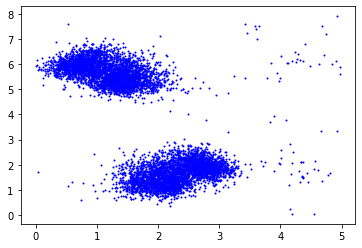

In [3]:
print(len(atoms))

for atom in atoms:
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/8)
    ly=(cell[1][1]/6)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>18,z<19.25),species=="Li")
    plt.scatter(xs[condition],ys[condition],s=1,color="blue")
    #condition=np.logical_and(np.logical_and(z>20.6,z<22),species=="Be")
    #plt.scatter(x[condition],y[condition],s=0.5,color="red")
#plt.hist(z[species=="H"],bins=100,range=(0,60))
#plt.hist(z[species=="He"],bins=100,range=(0,60))
plt.show()

100


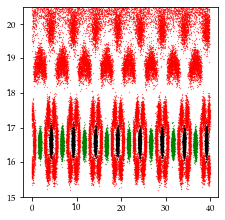

In [68]:
print(len(atoms))

for atom in atoms:
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    species=np.array(atom.get_chemical_symbols())
    condition=(species=="Li")
    plt.scatter(x[condition],z[condition],s=0.05,color="red")
    condition=(species=="He")
    plt.scatter(x[condition],z[condition],s=0.05,color="black")
    condition=(species=="H")
    plt.scatter(x[condition],z[condition],s=0.05,color="green")
#plt.hist(z[species=="H"],bins=100,range=(0,60))
#plt.hist(z[species=="He"],bins=100,range=(0,60))
plt.ylim([15,20.5])
plt.show()

77


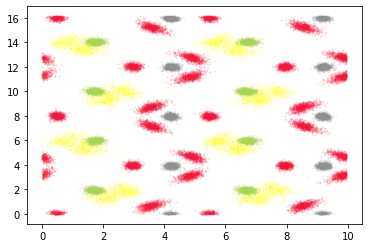

In [8]:
print(len(atoms))
myalpha=0.1
mysize=1

for atom in atoms:
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/4)
    ly=(cell[1][1]/3)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>15,z<22.5),species=="H")
    plt.scatter(xs[condition],ys[condition],s=mysize,color=paletteCaCO3[0],alpha=myalpha)
    condition=np.logical_and(np.logical_and(z>15,z<22.5),species=="He")
    plt.scatter(xs[condition],ys[condition],s=mysize,color=paletteCaCO3[1],alpha=myalpha)
    condition=np.logical_and(np.logical_and(z>18,z<19.25),species=="Li")
    plt.scatter(xs[condition],ys[condition],s=mysize,color="yellow",alpha=myalpha)
    condition=np.logical_and(np.logical_and(z>15,z<18),species=="Li")
    plt.scatter(xs[condition],ys[condition],s=mysize,color=paletteCaCO3[2],alpha=myalpha)
    #condition=np.logical_and(np.logical_and(z>20.6,z<22),species=="Be")
    #plt.scatter(x[condition],y[condition],s=0.5,color="red")
#plt.hist(z[species=="H"],bins=100,range=(0,60))
#plt.hist(z[species=="He"],bins=100,range=(0,60))
plt.show()

77


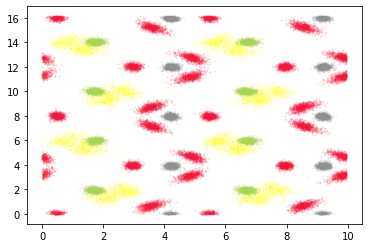

In [8]:
print(len(atoms))
myalpha=0.1
mysize=1

for atom in atoms:
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/4)
    ly=(cell[1][1]/3)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>15,z<22.5),species=="H")
    plt.scatter(xs[condition],ys[condition],s=mysize,color=paletteCaCO3[0],alpha=myalpha)
    condition=np.logical_and(np.logical_and(z>15,z<22.5),species=="He")
    plt.scatter(xs[condition],ys[condition],s=mysize,color=paletteCaCO3[1],alpha=myalpha)
    condition=np.logical_and(np.logical_and(z>18,z<19.25),species=="Li")
    plt.scatter(xs[condition],ys[condition],s=mysize,color="yellow",alpha=myalpha)
    condition=np.logical_and(np.logical_and(z>15,z<18),species=="Li")
    plt.scatter(xs[condition],ys[condition],s=mysize,color=paletteCaCO3[2],alpha=myalpha)
    #condition=np.logical_and(np.logical_and(z>20.6,z<22),species=="Be")
    #plt.scatter(x[condition],y[condition],s=0.5,color="red")
#plt.hist(z[species=="H"],bins=100,range=(0,60))
#plt.hist(z[species=="He"],bins=100,range=(0,60))
plt.show()

In [81]:
from matplotlib.colors import ListedColormap

cmap = plt.cm.viridis

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))
print(cmap.N)
# Set alpha
Nfirst=10
Nlast=128
my_cmap[:Nfirst,-1] = 0*np.ones(Nfirst)
my_cmap[Nfirst:-Nlast,-1] = np.linspace(0, 1, cmap.N-Nfirst-Nlast)
my_cmap[-Nlast:,-1] = 1*np.ones(Nlast) #np.linspace(0, 1, cmap.N-10)

# Create new colormap
my_cmap = ListedColormap(my_cmap)

256


In [78]:
from matplotlib.colors import ListedColormap

cmap = plt.cm.viridis

# Get the colormap colors
my_cmap2 = cmap(np.arange(cmap.N))
print(cmap.N)
# Set alpha
my_cmap2[:,-1] = 0*np.ones(cmap.N)


# Create new colormap
my_cmap2 = ListedColormap(my_cmap2)

256


1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.47it/s]


(163560,) (163560,)
19.9233057946 16.1297063088


/tmp/ipykernel_2690892/633645008.py:49: UserWarning: linewidths is ignored by contourf
  cs = plt.contourf(X, Y, Z,linewidths=0.2, levels=20, cmap=my_cmap, vmax=0.015)


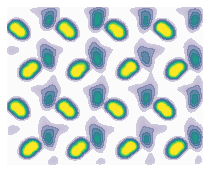

In [73]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 3.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

print(len(atoms))
myalpha=0.1
mysize=1

xs_collect, ys_collect = np.array([]), np.array([])
for atom in tqdm(atoms):
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/2)
    ly=(cell[1][1]/3)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>18,z<20.3),species=="Li")
    #plt.scatter(xs[condition],ys[condition],s=mysize,color="yellow",alpha=myalpha)
    xs_collect = np.concatenate([xs_collect, xs[condition]])
    ys_collect = np.concatenate([ys_collect, ys[condition]])
xs=xs_collect
ys=ys_collect
print(xs.shape,ys.shape)
print(lx,ly)
xmin=0
xmax=lx
ymin=0
ymax=ly
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([xs, ys])
kernel = stats.gaussian_kde(values,bw_method=0.05)
Z = np.reshape(kernel(positions).T, X.shape)

#fig, ax = plt.subplots(nrows=1, ncols=1)
#plt.sca(ax[0]) 
im = plt.imshow(np.rot90(Z), extent=[xmin, xmax, ymin, ymax], vmax=0.03, cmap=my_cmap)
cs = plt.contourf(X, Y, Z,linewidths=0.2, levels=20, cmap=my_cmap, vmax=0.015)
#plt.colorbar()
plt.axis('off')

plt.savefig("layers-O-surface.png",dpi=400,bbox_inches='tight')

#plt.scatter(xs,ys,s=10,color="black",alpha=myalpha,zorder=1)

    #condition=np.logical_and(np.logical_and(z>20.6,z<22),species=="Be")
    #plt.scatter(x[condition],y[condition],s=0.5,color="red")
#plt.hist(z[species=="H"],bins=100,range=(0,60))
#plt.hist(z[species=="He"],bins=100,range=(0,60))
plt.show()

1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.71it/s]


(226175,) (226175,)
19.9233057946 16.1297063088


/tmp/ipykernel_2690892/1756870923.py:49: UserWarning: linewidths is ignored by contourf
  cs = plt.contourf(X, Y, Z,linewidths=0.2, levels=20, cmap=my_cmap, vmax=0.01)


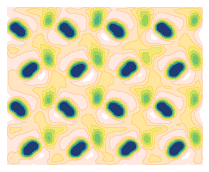

In [82]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 3.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

print(len(atoms))
myalpha=0.1
mysize=1

xs_collect, ys_collect = np.array([]), np.array([])
for atom in tqdm(atoms):
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/2)
    ly=(cell[1][1]/3)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>18,z<21.3),species=="Li")
    #plt.scatter(xs[condition],ys[condition],s=mysize,color="yellow",alpha=myalpha)
    xs_collect = np.concatenate([xs_collect, xs[condition]])
    ys_collect = np.concatenate([ys_collect, ys[condition]])
xs=xs_collect
ys=ys_collect
print(xs.shape,ys.shape)
print(lx,ly)
xmin=0
xmax=lx
ymin=0
ymax=ly
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([xs, ys])
kernel = stats.gaussian_kde(values,bw_method=0.05)
Z = np.reshape(kernel(positions).T, X.shape)

#fig, ax = plt.subplots(nrows=1, ncols=1)
#plt.sca(ax[0]) 
im = plt.imshow(np.rot90(Z), extent=[xmin, xmax, ymin, ymax], vmax=0.03, cmap=my_cmap2)
cs = plt.contourf(X, Y, Z,linewidths=0.2, levels=20, cmap=my_cmap, vmax=0.01)
#plt.colorbar()
plt.axis('off')

plt.savefig("all-layers-O-surface.png",dpi=400,bbox_inches='tight')

#plt.scatter(xs,ys,s=10,color="black",alpha=myalpha,zorder=1)

    #condition=np.logical_and(np.logical_and(z>20.6,z<22),species=="Be")
    #plt.scatter(x[condition],y[condition],s=0.5,color="red")
#plt.hist(z[species=="H"],bins=100,range=(0,60))
#plt.hist(z[species=="He"],bins=100,range=(0,60))
plt.show()

1000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.67it/s]


(226175,) (226175,)
19.9233057946 16.1297063088


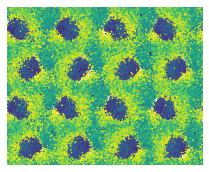

In [72]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 3.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

print(len(atoms))
myalpha=0.1
mysize=1

xs_collect, ys_collect, z_collect = np.array([]), np.array([]), np.array([])
for atom in tqdm(atoms):
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/2)
    ly=(cell[1][1]/3)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>18,z<21.3),species=="Li")
    #plt.scatter(xs[condition],ys[condition],s=mysize,color="yellow",alpha=myalpha)
    xs_collect = np.concatenate([xs_collect, xs[condition]])
    ys_collect = np.concatenate([ys_collect, ys[condition]])
    z_collect = np.concatenate([z_collect, z[condition]])
xs=xs_collect
ys=ys_collect
z=z_collect

print(xs.shape,ys.shape)
print(lx,ly)
xmin=0
xmax=lx
ymin=0
ymax=ly
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
#values = np.vstack([xs, ys])
#kernel = stats.gaussian_kde(values,bw_method=0.05)
Z = X #np.reshape(kernel(positions).T, X.shape)

#fig, ax = plt.subplots(nrows=1, ncols=1)
#plt.sca(ax[0]) 
im = plt.imshow(np.rot90(Z), extent=[xmin, xmax, ymin, ymax], vmax=0.03, cmap=my_cmap2)
#cs = plt.contourf(X, Y, Z,linewidths=0.2, levels=20, cmap=my_cmap, vmax=0.01)
#plt.colorbar()
plt.axis('off')
scatt = plt.scatter(xs,ys,c=(z-16.5),s=0.5)
#plt.colorbar(scatt)
plt.savefig("all-layers-O-surface-scatter.png",dpi=400,bbox_inches='tight')

#plt.scatter(xs,ys,s=10,color="black",alpha=myalpha,zorder=1)

    #condition=np.logical_and(np.logical_and(z>20.6,z<22),species=="Be")
    #plt.scatter(x[condition],y[condition],s=0.5,color="red")
#plt.hist(z[species=="H"],bins=100,range=(0,60))
#plt.hist(z[species=="He"],bins=100,range=(0,60))
plt.show()

100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 386.38it/s]


(6258,) (6258,)
19.9233057946 16.1297063088


/tmp/ipykernel_2690892/3748303567.py:49: UserWarning: linewidths is ignored by contourf
  cs = plt.contourf(X, Y, Z,linewidths=0.2, levels=20, cmap=my_cmap, vmax=0.01)


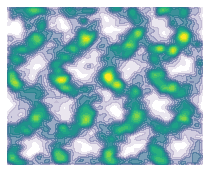

In [59]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 3.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

print(len(atoms))
myalpha=0.1
mysize=1

xs_collect, ys_collect = np.array([]), np.array([])
for atom in tqdm(atoms):
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/2)
    ly=(cell[1][1]/3)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>20.3,z<21.3),species=="Li")
    #plt.scatter(xs[condition],ys[condition],s=mysize,color="yellow",alpha=myalpha)
    xs_collect = np.concatenate([xs_collect, xs[condition]])
    ys_collect = np.concatenate([ys_collect, ys[condition]])
xs=xs_collect
ys=ys_collect
print(xs.shape,ys.shape)
print(lx,ly)
xmin=0
xmax=lx
ymin=0
ymax=ly
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([xs, ys])
kernel = stats.gaussian_kde(values,bw_method=0.05)
Z = np.reshape(kernel(positions).T, X.shape)

#fig, ax = plt.subplots(nrows=1, ncols=1)
#plt.sca(ax[0]) 
im = plt.imshow(np.rot90(Z), extent=[xmin, xmax, ymin, ymax], vmax=0.03, cmap=my_cmap2)
cs = plt.contourf(X, Y, Z,linewidths=0.2, levels=20, cmap=my_cmap, vmax=0.01)
#plt.colorbar()
plt.axis('off')

#plt.scatter(xs,ys,s=10,color="black",alpha=myalpha,zorder=1)

    #condition=np.logical_and(np.logical_and(z>20.6,z<22),species=="Be")
    #plt.scatter(x[condition],y[condition],s=0.5,color="red")
#plt.hist(z[species=="H"],bins=100,range=(0,60))
#plt.hist(z[species=="He"],bins=100,range=(0,60))
plt.show()

96


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 358.65it/s]


(9051,) (9051,)
19.9233057946 16.1297063088


/tmp/ipykernel_2690892/3572572710.py:49: UserWarning: linewidths is ignored by contourf
  cs = plt.contourf(X, Y, Z,linewidths=0.2, cmap=my_cmap, vmax=0.015)
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 379.39it/s]


(6225,) (6225,)
19.9233057946 16.1297063088


/tmp/ipykernel_2690892/3572572710.py:86: UserWarning: linewidths is ignored by contourf
  cs = plt.contourf(X, Y, Z,linewidths=0.2, cmap=my_cmap, vmax=0.015)


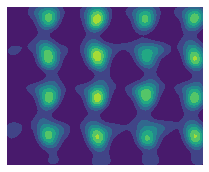

In [21]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 3.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

print(len(atoms))
myalpha=0.1
mysize=1

xs_collect, ys_collect = np.array([]), np.array([])
for atom in tqdm(atoms):
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/2)
    ly=(cell[1][1]/3)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>18,z<19.25),species=="Li")
    #plt.scatter(xs[condition],ys[condition],s=mysize,color="yellow",alpha=myalpha)
    xs_collect = np.concatenate([xs_collect, xs[condition]])
    ys_collect = np.concatenate([ys_collect, ys[condition]])
xs=xs_collect
ys=ys_collect
print(xs.shape,ys.shape)
print(lx,ly)
xmin=0
xmax=lx
ymin=0
ymax=ly
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([xs, ys])
kernel = stats.gaussian_kde(values,bw_method=0.05)
Z = np.reshape(kernel(positions).T, X.shape)

#fig, ax = plt.subplots(nrows=1, ncols=1)
#plt.sca(ax[0]) 
im = plt.imshow(np.rot90(Z), extent=[xmin, xmax, ymin, ymax], vmax=0.03, cmap=my_cmap)
cs = plt.contourf(X, Y, Z,linewidths=0.2, cmap=my_cmap, vmax=0.015)
#plt.colorbar()
plt.axis('off')


xs_collect, ys_collect = np.array([]), np.array([])
for atom in tqdm(atoms):
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/2)
    ly=(cell[1][1]/3)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>19.4,z<20.3),species=="Li")
    #plt.scatter(xs[condition],ys[condition],s=mysize,color="yellow",alpha=myalpha)
    xs_collect = np.concatenate([xs_collect, xs[condition]])
    ys_collect = np.concatenate([ys_collect, ys[condition]])
xs=xs_collect
ys=ys_collect
print(xs.shape,ys.shape)
print(lx,ly)
xmin=0
xmax=lx
ymin=0
ymax=ly
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([xs, ys])
kernel = stats.gaussian_kde(values,bw_method=0.05)
Z = np.reshape(kernel(positions).T, X.shape)

#fig, ax = plt.subplots(nrows=1, ncols=1)
#plt.sca(ax[0]) 
im = plt.imshow(np.rot90(Z), extent=[xmin, xmax, ymin, ymax], vmax=0.03, cmap=my_cmap)
cs = plt.contourf(X, Y, Z,linewidths=0.2, cmap=my_cmap, vmax=0.015)
#plt.colorbar()
plt.axis('off')

plt.savefig("layers-O-surface.png",dpi=300,bbox_inches='tight')

#plt.scatter(xs,ys,s=10,color="black",alpha=myalpha,zorder=1)

    #condition=np.logical_and(np.logical_and(z>20.6,z<22),species=="Be")
    #plt.scatter(x[condition],y[condition],s=0.5,color="red")
#plt.hist(z[species=="H"],bins=100,range=(0,60))
#plt.hist(z[species=="He"],bins=100,range=(0,60))
plt.show()

96


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 369.91it/s]


(9051,) (9051,)


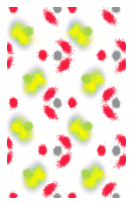

In [6]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 3.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

print(len(atoms))
myalpha=0.1
mysize=1

xs_collect, ys_collect = np.array([]), np.array([])
for atom in tqdm(atoms):
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/4)
    ly=(cell[1][1]/3)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>18,z<19.25),species=="Li")
    #plt.scatter(xs[condition],ys[condition],s=mysize,color="yellow",alpha=myalpha)
    xs_collect = np.concatenate([xs_collect, xs[condition]])
    ys_collect = np.concatenate([ys_collect, ys[condition]])
xs=xs_collect
ys=ys_collect
print(xs.shape,ys.shape)
xmin=0
xmax=lx
ymin=0
ymax=ly
X, Y = np.mgrid[xmin:xmax:300j, ymin:ymax:300j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([xs, ys])
kernel = stats.gaussian_kde(values,bw_method=0.1)
Z = np.reshape(kernel(positions).T, X.shape)

#fig, ax = plt.subplots(nrows=1, ncols=1)
#plt.sca(ax[0]) 
im = plt.imshow(np.rot90(Z), extent=[xmin, xmax, ymin, ymax],cmap=my_cmap)
#cs = plt.contourf(X, Y, Z,linewidths=0.2, cmap=my_cmap, vmax=0.05)
#plt.colorbar()
plt.axis('off')

plt.savefig("first-layer-O-surface.png",dpi=300,bbox_inches='tight')

#plt.scatter(xs,ys,s=10,color="black",alpha=myalpha,zorder=1)

    #condition=np.logical_and(np.logical_and(z>20.6,z<22),species=="Be")
    #plt.scatter(x[condition],y[condition],s=0.5,color="red")
#plt.hist(z[species=="H"],bins=100,range=(0,60))
#plt.hist(z[species=="He"],bins=100,range=(0,60))

myalpha=0.1
mysize=1

for atom in atoms:
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/4)
    ly=(cell[1][1]/3)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>15,z<22.5),species=="H")
    plt.scatter(xs[condition],ys[condition],s=mysize,color=paletteCaCO3[0],alpha=myalpha)
    condition=np.logical_and(np.logical_and(z>15,z<22.5),species=="He")
    plt.scatter(xs[condition],ys[condition],s=mysize,color=paletteCaCO3[1],alpha=myalpha)
    condition=np.logical_and(np.logical_and(z>18,z<19.25),species=="Li")
    plt.scatter(xs[condition],ys[condition],s=mysize,color="yellow",alpha=myalpha)
    condition=np.logical_and(np.logical_and(z>15,z<18),species=="Li")
    plt.scatter(xs[condition],ys[condition],s=mysize,color=paletteCaCO3[2],alpha=myalpha)
    #condition=np.logical_and(np.logical_and(z>20.6,z<22),species=="Be")
    #plt.scatter(x[condition],y[condition],s=0.5,color="red")
#plt.hist(z[species=="H"],bins=100,range=(0,60))
#plt.hist(z[species=="He"],bins=100,range=(0,60))


plt.savefig("first-layer-O-surface-2.png",dpi=300,bbox_inches='tight')

plt.show()

82


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 183.66it/s]


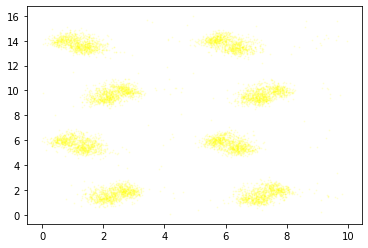

In [14]:
print(len(atoms))
myalpha=0.1
mysize=1

for atom in tqdm(atoms):
    cell=atom.get_cell()
    x=atom.get_positions()[:,0]
    y=atom.get_positions()[:,1]
    z=atom.get_positions()[:,2]
    lx=(cell[0][0]/4)
    ly=(cell[1][1]/3)
    xs=x-lx*np.floor(x/lx)
    ys=y-ly*np.floor(y/ly)
    xs_collect.append(xs)
    ys_collect.append(ys)
    species=np.array(atom.get_chemical_symbols())
    condition=np.logical_and(np.logical_and(z>18,z<19.25),species=="Li")
    plt.scatter(xs[condition],ys[condition],s=mysize,color="yellow",alpha=myalpha)

plt.show()

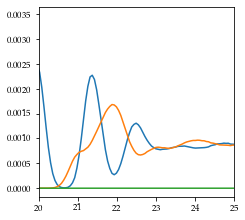

In [51]:
data=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production/Analysis/histoO-final.txt")
plt.plot(data[:,1],data[:,3])
data=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production/Analysis/histoH-final.txt")
plt.plot(data[:,1],0.62*data[:,3])
data=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production/Analysis/histoCa-final.txt")
plt.plot(data[:,1],0.1*data[:,3])
plt.xlim([20,25])

plt.show()

In [ ]:
# Use data from here
https://pubs.acs.org/doi/pdf/10.1021/acs.jpcc.0c04094

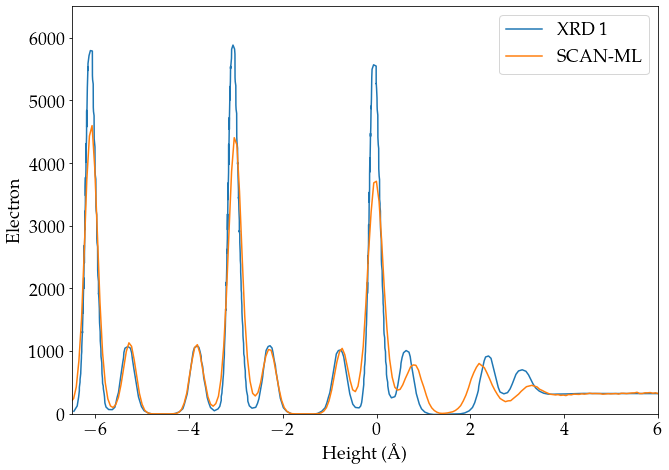

In [37]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 2*9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3*3.5, 3*2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page


numCa=576
numC=576
numO=4296
numH=5136

coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoC-final.txt")[:,2]

#histoO=histoO/(np.trapz(histoO,x)
zsurf=19.125
electron_density_from_histo = histoCa*20+histoC*6+histoO*8+histoH*1
#electron_density_from_histo = histoCa*0+histoC*0+histoO*8+histoH*0


data=np.genfromtxt("data-surface/sxrd-avg.txt")
data[:,1] = savgol_filter(data[:,1], 7, 3)
plt.plot(data[:,0],data[:,1],label="XRD 1")
#data=np.genfromtxt("data-surface/xr.txt")
#plt.plot(data[:,0],(380/0.4)*data[:,1],label="XRD 2")


plt.plot(coord-zsurf,electron_density_from_histo*(1/1.e5)*(380/0.24),label="SCAN-ML")


#data=np.genfromtxt("data-surface/rigid-ion.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/amoeba.txt")
#plt.plot(data[:,0],data[:,1],label="AMOEBA")

#data=np.genfromtxt("data-surface/sm.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/reaxff.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/rim2.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])

plt.xlim([-6.5,6])
plt.ylim([0,6500])

plt.legend()
plt.ylabel("Electron ")
plt.xlabel("Height (\AA)")
#plt.xlim([-1,1])

#plt.ylim([0,1000])

plt.show()


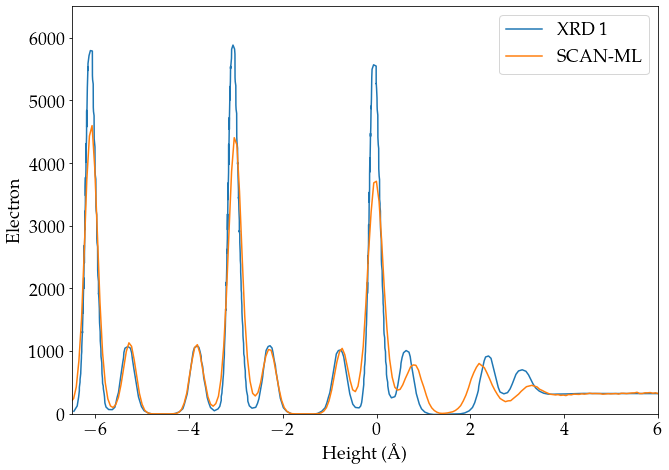

In [37]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 2*9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3*3.5, 3*2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page


numCa=576
numC=576
numO=4296
numH=5136

coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoC-final.txt")[:,2]

#histoO=histoO/(np.trapz(histoO,x)
zsurf=19.125
electron_density_from_histo = histoCa*20+histoC*6+histoO*8+histoH*1
#electron_density_from_histo = histoCa*0+histoC*0+histoO*8+histoH*0


data=np.genfromtxt("data-surface/sxrd-avg.txt")
data[:,1] = savgol_filter(data[:,1], 7, 3)
plt.plot(data[:,0],data[:,1],label="XRD 1")
#data=np.genfromtxt("data-surface/xr.txt")
#plt.plot(data[:,0],(380/0.4)*data[:,1],label="XRD 2")


plt.plot(coord-zsurf,electron_density_from_histo*(1/1.e5)*(380/0.24),label="SCAN-ML")


#data=np.genfromtxt("data-surface/rigid-ion.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/amoeba.txt")
#plt.plot(data[:,0],data[:,1],label="AMOEBA")

#data=np.genfromtxt("data-surface/sm.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/reaxff.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/rim2.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])

plt.xlim([-6.5,6])
plt.ylim([0,6500])

plt.legend()
plt.ylabel("Electron ")
plt.xlabel("Height (\AA)")
#plt.xlim([-1,1])

#plt.ylim([0,1000])

plt.show()


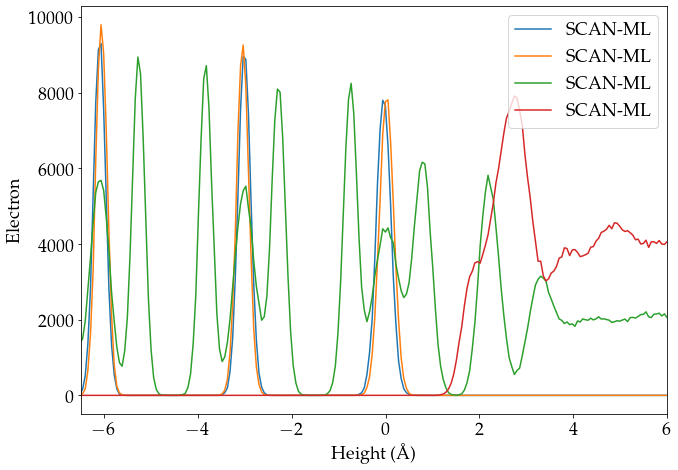

In [43]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 2*9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3*3.5, 3*2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page


numCa=576
numC=576
numO=4296
numH=5136

coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoC-final.txt")[:,2]

#histoO=histoO/(np.trapz(histoO,x)
zsurf=19.125
electron_density_from_histo = histoCa*20+histoC*6+histoO*8+histoH*1
#electron_density_from_histo = histoCa*0+histoC*0+histoO*8+histoH*0


#data=np.genfromtxt("data-surface/sxrd-avg.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 3)
#plt.plot(data[:,0],data[:,1],label="XRD 1")
#data=np.genfromtxt("data-surface/xr.txt")
#plt.plot(data[:,0],(380/0.4)*data[:,1],label="XRD 2")


plt.plot(coord-zsurf,histoCa,label="SCAN-ML")
plt.plot(coord-zsurf,histoC,label="SCAN-ML")
plt.plot(coord-zsurf,histoO,label="SCAN-ML")
plt.plot(coord-zsurf,histoH,label="SCAN-ML")


#data=np.genfromtxt("data-surface/rigid-ion.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/amoeba.txt")
#plt.plot(data[:,0],data[:,1],label="AMOEBA")

#data=np.genfromtxt("data-surface/sm.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/reaxff.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/rim2.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])

plt.xlim([-6.5,6])
#plt.ylim([0,6500])

plt.legend()
plt.ylabel("Electron ")
plt.xlabel("Height (\AA)")
#plt.xlim([-1,1])

#plt.ylim([0,1000])

plt.show()


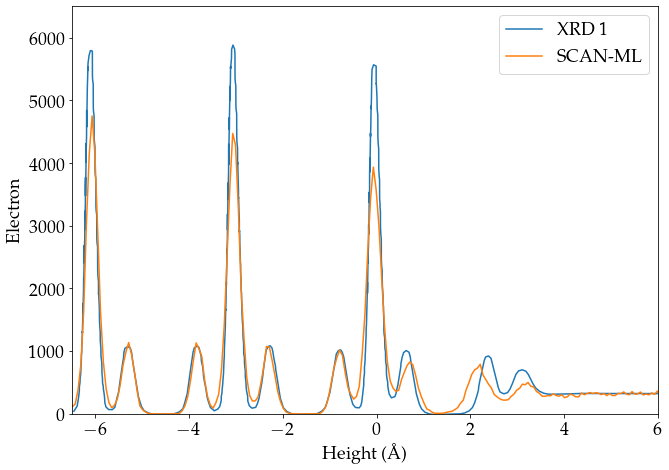

In [36]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 2*9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3*3.5, 3*2.5) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page


numCa=576
numC=576
numO=4296
numH=5136

coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-small/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-small/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-small/Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-small/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-small/Analysis/histoC-final.txt")[:,2]

#histoO=histoO/(np.trapz(histoO,x)
zsurf=16.3
electron_density_from_histo = histoCa*20+histoC*6+histoO*8+histoH*1


data=np.genfromtxt("data-surface/sxrd-avg.txt")
data[:,1] = savgol_filter(data[:,1], 7, 3)
plt.plot(data[:,0],data[:,1],label="XRD 1")
#data=np.genfromtxt("data-surface/xr.txt")
#plt.plot(data[:,0],(380/0.4)*data[:,1],label="XRD 2")


plt.plot(coord-zsurf,electron_density_from_histo*(1/1.e4)*(380/0.22),label="SCAN-ML")


#data=np.genfromtxt("data-surface/rigid-ion.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/amoeba.txt")
#plt.plot(data[:,0],data[:,1],label="AMOEBA")

#data=np.genfromtxt("data-surface/sm.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/reaxff.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/rim2.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])

plt.xlim([-6.5,6])
plt.ylim([0,6500])

plt.legend()
plt.ylabel("Electron ")
plt.xlabel("Height (\AA)")
#plt.xlim([-1,1])

#plt.xlim([15,18])

plt.show()


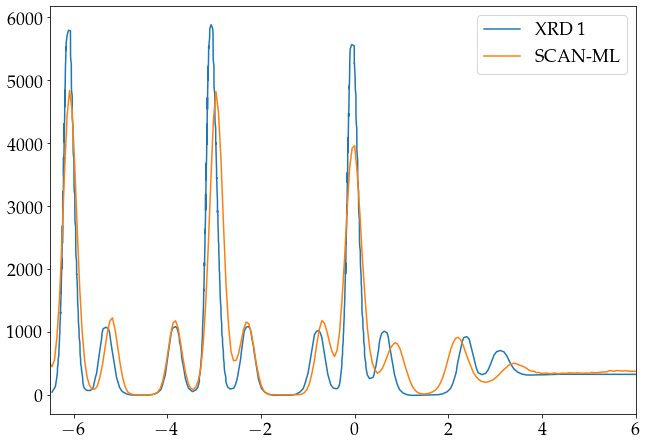

In [38]:
numCa=576
numC=576
numO=4296
numH=5136

coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT-xlarger/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT-xlarger/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT-xlarger/Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT-xlarger/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT-xlarger/Analysis/histoC-final.txt")[:,2]

#histoO=histoO/(np.trapz(histoO,x)
zsurf=40.1
electron_density_from_histo = histoCa*20+histoC*6+histoO*8+histoH*1


data=np.genfromtxt("data-surface/sxrd-avg.txt")
data[:,1] = savgol_filter(data[:,1], 7, 3)
plt.plot(data[:,0],data[:,1],label="XRD 1")
#data=np.genfromtxt("data-surface/xr.txt")
#plt.plot(data[:,0],(380/0.4)*data[:,1],label="XRD 2")


plt.plot(coord-zsurf,electron_density_from_histo*(1/1.e6)*(380/0.04),label="SCAN-ML")


#data=np.genfromtxt("data-surface/rigid-ion.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/amoeba.txt")
#plt.plot(data[:,0],data[:,1],label="AMOEBA")

#data=np.genfromtxt("data-surface/sm.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/reaxff.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/rim2.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])

plt.xlim([-6.5,6])
#plt.ylim([0,6500])

plt.legend()
#plt.xlim([-1,1])

#plt.ylim([0,1000])

plt.show()

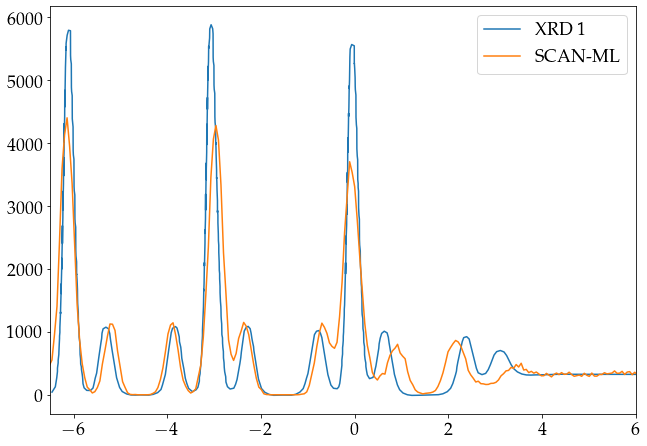

In [45]:
numCa=576
numC=576
numO=4296
numH=5136

coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT-xlarger-newarea/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT-xlarger-newarea/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT-xlarger-newarea/Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT-xlarger-newarea/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT-xlarger-newarea/Analysis/histoC-final.txt")[:,2]

#histoO=histoO/(np.trapz(histoO,x)
zsurf=40.1
electron_density_from_histo = histoCa*20+histoC*6+histoO*8+histoH*1


data=np.genfromtxt("data-surface/sxrd-avg.txt")
data[:,1] = savgol_filter(data[:,1], 7, 3)
plt.plot(data[:,0],data[:,1],label="XRD 1")
#data=np.genfromtxt("data-surface/xr.txt")
#plt.plot(data[:,0],(380/0.4)*data[:,1],label="XRD 2")


plt.plot(coord-zsurf,electron_density_from_histo*(1/1.e4)*(380/0.16),label="SCAN-ML")


#data=np.genfromtxt("data-surface/rigid-ion.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/amoeba.txt")
#plt.plot(data[:,0],data[:,1],label="AMOEBA")

#data=np.genfromtxt("data-surface/sm.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/reaxff.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/rim2.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])

plt.xlim([-6.5,6])
#plt.ylim([0,6500])

plt.legend()
#plt.xlim([-1,1])

#plt.ylim([0,1000])

plt.show()

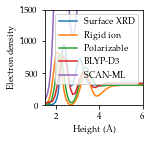

In [11]:
coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoC-final.txt")[:,2]

zsurf=19.125
electron_density_from_histo = histoCa*20+histoC*6+histoO*8+histoH*1


data=np.genfromtxt("data-surface/sxrd-avg.txt")
plt.plot(data[:,0],data[:,1],label="Surface XRD")
data=np.genfromtxt("data-surface/rigid-ion.txt")
plt.plot(data[:,0],data[:,1],label="Rigid ion")
data=np.genfromtxt("data-surface/amoeba.txt")
plt.plot(data[:,0],data[:,1],label="Polarizable")
data=np.genfromtxt("data-surface/dft.txt")
plt.plot(data[:,0],data[:,1],label="BLYP-D3")
#data=np.genfromtxt("data-surface/xr.txt")
#plt.plot(data[:,0],(380/0.4)*data[:,1])
#data=np.genfromtxt("data-surface/sm.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/reaxff.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/rim2.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])

plt.plot(coord-zsurf,electron_density_from_histo*(1/1.e5)*(380/0.23),label="SCAN-ML")


plt.xlim([1.5,6])
#plt.xlim([-1,1])
plt.legend(ncol=1)
plt.ylabel("Electron density")
plt.xlabel("Height (\AA)")

plt.ylim([0,1500])

plt.show()

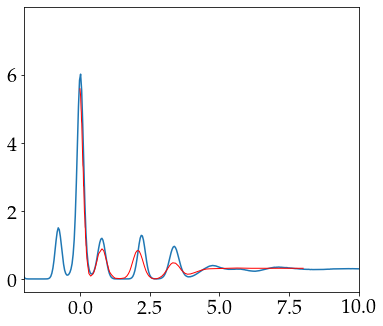

In [25]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3*2, 3*1.75)

coord=np.genfromtxt("data-surface/rigid-ion-new/ca.dmap")[:,0]
histoCa=np.genfromtxt("data-surface/rigid-ion-new/ca.dmap")[:,1]
histoC=np.genfromtxt("data-surface/rigid-ion-new/cc.dmap")[:,1]
histoOc=np.genfromtxt("data-surface/rigid-ion-new/oc.dmap")[:,1]
histoOw=np.genfromtxt("data-surface/rigid-ion-new/ow.dmap")[:,1]

electron_density_from_histo_ri = histoCa*20+histoC*6+histoOc*8+histoOw*8

zsurf_ri=44.3
plt.plot(coord-zsurf_ri,electron_density_from_histo_ri*1.1)

data=np.genfromtxt("data-surface/rigid-ion.txt")
y2 = np.interp(x, data[:,0],data[:,1]/1000)
plt.plot(x,y2,label="Rigid ion",linewidth=mylinewidth,color="red")

plt.xlim([-2,10])
plt.show()


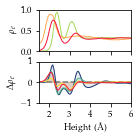

In [33]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (1.8, 1.8)

fig, ax = plt.subplots(2,sharex=True)

myalpha=0.1
mylinewidth=1.

coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoC-final.txt")[:,2]

zsurf=19.125
electron_density_from_histo = histoCa*20+histoC*6+histoO*8+histoH*1


data=np.genfromtxt("data-surface/sxrd-avg.txt")
ax[0].plot(data[:,0],data[:,1]/1000,label="Experiment 1",linewidth=mylinewidth,color=paletteFessa[3])
data=np.genfromtxt("data-surface/xr.txt")
ax[0].plot(data[:,0],(380/0.4)*data[:,1]/1000,label="Experiment 2",linewidth=mylinewidth,color=paletteFessa[5])
ax[0].plot(coord-zsurf,electron_density_from_histo*(1/1.e6)*(380/0.13)/1000,label="SCAN-ML",linewidth=mylinewidth,color=paletteFessa[6])

ax[0].set_ylim([0,1])


x=np.linspace(0,8,1000)
data=np.genfromtxt("data-surface/sxrd-avg.txt")
y = np.interp(x, data[:,0],data[:,1]/1000)

# New rigid ion
coord_ri=np.genfromtxt("data-surface/rigid-ion-new/ca.dmap")[:,0]
histoCa_ri=np.genfromtxt("data-surface/rigid-ion-new/ca.dmap")[:,1]
histoC_ri=np.genfromtxt("data-surface/rigid-ion-new/cc.dmap")[:,1]
histoOc_ri=np.genfromtxt("data-surface/rigid-ion-new/oc.dmap")[:,1]
histoOw_ri=np.genfromtxt("data-surface/rigid-ion-new/ow.dmap")[:,1]
electron_density_from_histo_ri = histoCa_ri*20+histoC_ri*6+histoOc_ri*8+histoOw_ri*8
zsurf_ri=44.3
y2 = np.interp(x, coord_ri-zsurf_ri,electron_density_from_histo_ri*1.1)
ax[1].plot(x,y2-y,label="Rigid ion",linewidth=mylinewidth,color=paletteFessa[0])
ax[1].fill_between(x,0,y2-y,color=paletteFessa[0],alpha=myalpha)

# Old rigid ion
#data=np.genfromtxt("data-surface/rigid-ion.txt")
#y2 = np.interp(x, data[:,0],data[:,1]/1000)
#ax[1].plot(x,y2-y,label="Rigid ion",linewidth=mylinewidth,color=paletteFessa[0])
#ax[1].fill_between(x,0,y2-y,color=paletteFessa[0],alpha=myalpha)

data=np.genfromtxt("data-surface/amoeba.txt")
y2 = np.interp(x, data[:,0],data[:,1]/1000)
ax[1].plot(x,y2-y,label="Polarizable",linewidth=mylinewidth,color=paletteFessa[2])
ax[1].fill_between(x,0,y2-y,color=paletteFessa[2],alpha=myalpha)

data=np.genfromtxt("data-surface/dft.txt")
y2 = np.interp(x, data[:,0],data[:,1]/1000)
ax[1].plot(x,y2-y,label="BLYP-D3",linewidth=mylinewidth,color=paletteFessa[4])
ax[1].fill_between(x,0,y2-y,color=paletteFessa[4],alpha=myalpha)

#data=np.genfromtxt("data-surface/xr.txt")
#plt.plot(data[:,0],(380/0.4)*data[:,1])
#data=np.genfromtxt("data-surface/sm.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/reaxff.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/rim2.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])

y2 = np.interp(x, coord-zsurf,electron_density_from_histo*(1/1.e6)*(380/0.13)/1000)
ax[1].plot(x,y2-y,linewidth=mylinewidth,color=paletteFessa[6],label="SCAN-ML")
ax[1].fill_between(x,0,y2-y,color=paletteFessa[6],alpha=myalpha)

ax[1].plot([-10,10],[0,0],"--",color="black",alpha=0.5,zorder=0)

# Dummy entries
ax[1].plot([-2,-1],[0,0],label="Exp. 1",color=paletteFessa[3])
ax[1].plot(data[:,0],(380/0.4)*data[:,1],label="Exp. 2",color=paletteFessa[5])

ax[1].set_xlim([1.5,6])
ax[0].set_yticks([0,0.5,1])
ax[1].set_xticks([2,3,4,5,6])
ax[1].set_ylim([-1,1])
plt.tight_layout()
#ax[1].legend(fontsize=8,bbox_to_anchor=(1.25, -0.75), ncol=2, handlelength=1)
ax[0].set_ylabel(r"$\rho_e$")
ax[1].set_ylabel(r"$\Delta\rho_e$")
ax[1].set_xlabel("Height (\AA)")

plt.tight_layout(pad=0.2)
#plt.ylim([0,1000])
plt.savefig("electron_density_water_2.pdf",bbox_inches="tight")

plt.show()

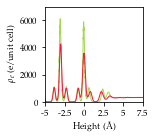

In [8]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (1.75, 1.75)

coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoC-final.txt")[:,2]

zsurf=19.125
electron_density_from_histo = histoCa*20+histoC*6+histoO*8+histoH*1


data=np.genfromtxt("data-surface/sxrd-avg.txt")
plt.plot(data[:,0],data[:,1],label="Experiment",linewidth=mylinewidth,color=paletteFessa[3])
#data=np.genfromtxt("data-surface/rigid-ion.txt")
#plt.plot(data[:,0],data[:,1],label="Rigid ion")
#data=np.genfromtxt("data-surface/amoeba.txt")
#plt.plot(data[:,0],data[:,1],label="Polarizable")
#data=np.genfromtxt("data-surface/dft.txt")
#plt.plot(data[:,0],data[:,1],label="BLYP-D3")
#data=np.genfromtxt("data-surface/xr.txt")
#plt.plot(data[:,0],(380/0.4)*data[:,1])
#data=np.genfromtxt("data-surface/sm.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/reaxff.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/rim2.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])

plt.plot(coord-zsurf,electron_density_from_histo*(1/1.e6)*(380/0.13),label="SCAN-ML",linewidth=mylinewidth,color=paletteFessa[6])


plt.xlim([-5,7.5])
plt.xticks([-5,-2.5,0,2.5,5,7.5],["-5","-2.5","0","2.5","5","7.5"])

#plt.xlim([-1,1])
#plt.legend(ncol=1)
plt.ylabel(r"$\rho_e$ (e/unit cell)")
plt.xlabel("Height (\AA)")

plt.ylim([0,7000])

plt.savefig("electron_density.pdf",bbox_inches="tight")

plt.show()

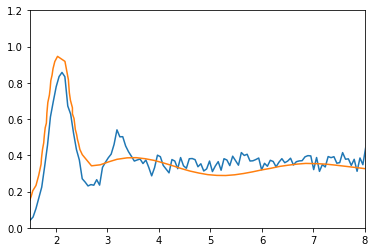

In [21]:
coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom-NVT/Analysis/histoC-final.txt")[:,2]

zsurf=19.25
electron_density_from_histo = histoCa*20+histoC*6+histoO*8+histoH*1

plt.plot(coord-zsurf,electron_density_from_histo*(1/1.e4)*(0.38/0.15))

data=np.genfromtxt("data-surface/xr.txt")
plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/sm.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/reaxff.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/rim2.txt")
#data[:,1] = savgol_filter(data[:,1], 7, 2)
#plt.plot(data[:,0],data[:,1])

plt.xlim([1.5,8])
plt.ylim([0,1.2])

plt.show()

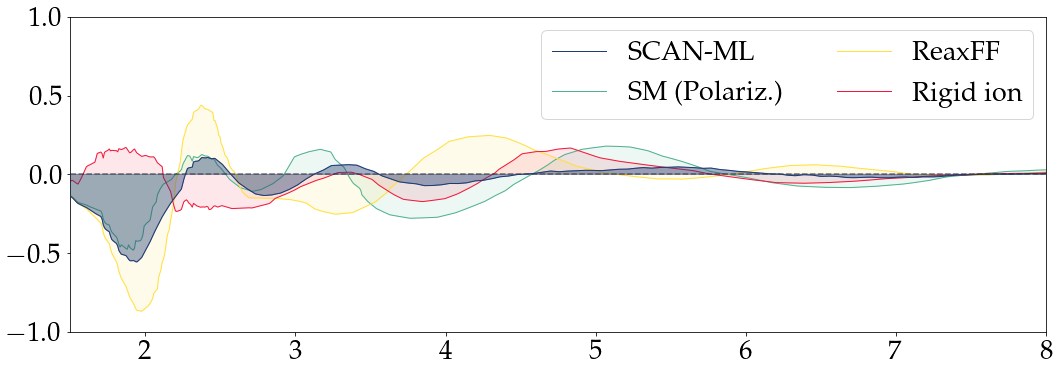

In [104]:
myalpha=0.1
mylinewidth=1.

data=np.genfromtxt("data-surface/xr.txt")
data[:,1] = savgol_filter(data[:,1], 7, 2)
x=np.linspace(0,8,1000)
y = np.interp(x, data[:,0],data[:,1])
#plt.plot(data[:,0],data[:,1])
#plt.plot(x,y)

zsurf=19.25
y2 = np.interp(x, coord-zsurf,electron_density_from_histo*(1/1.e6)*(0.38/0.15))
plt.plot(x,y2-y,color=paletteFessa[0],label="SCAN-ML",linewidth=mylinewidth,zorder=4)
plt.fill_between(x,0,y2-y,color=paletteFessa[0],alpha=0.4,zorder=4)

data=np.genfromtxt("data-surface/sm.txt")
data[:,1] = savgol_filter(data[:,1], 7, 2)
y2 = np.interp(x, data[:,0],data[:,1])
plt.plot(x,y2-y,color=paletteFessa[2],label="SM (Polariz.)",linewidth=mylinewidth)
plt.fill_between(x,0,y2-y,color=paletteFessa[2],alpha=myalpha)


data=np.genfromtxt("data-surface/reaxff.txt")
data[:,1] = savgol_filter(data[:,1], 7, 5)
y2 = np.interp(x, data[:,0],data[:,1])
plt.plot(x,y2-y,color=paletteFessa[4],label="ReaxFF",linewidth=mylinewidth)
plt.fill_between(x,0,y2-y,color=paletteFessa[4],alpha=myalpha)

data=np.genfromtxt("data-surface/rim2.txt")
data[:,1] = savgol_filter(data[:,1], 7, 5)
y2 = np.interp(x, data[:,0],data[:,1])
plt.plot(x,y2-y,color=paletteFessa[6],label="Rigid ion",linewidth=mylinewidth)
plt.fill_between(x,0,y2-y,color=paletteFessa[6],alpha=myalpha)




#axs[0].plot(x,y2-y,color=paletteFessa[0],label="Rigid ion",linewidth=mylinewidth)
#axs[0].fill_between(x,0,y2-y,color=paletteFessa[0],alpha=myalpha)


#data=np.genfromtxt("data-surface/sm.txt")
#plt.plot(data[:,0],data[:,1])
#data=np.genfromtxt("data-surface/reaxff.txt")
#plt.plot(data[:,0],data[:,1])

plt.xlim([1.5,8])
plt.ylim([-1,1])
plt.plot(x,0*x,"--",color="black",alpha=0.5)
plt.legend(ncol=2)

plt.show()

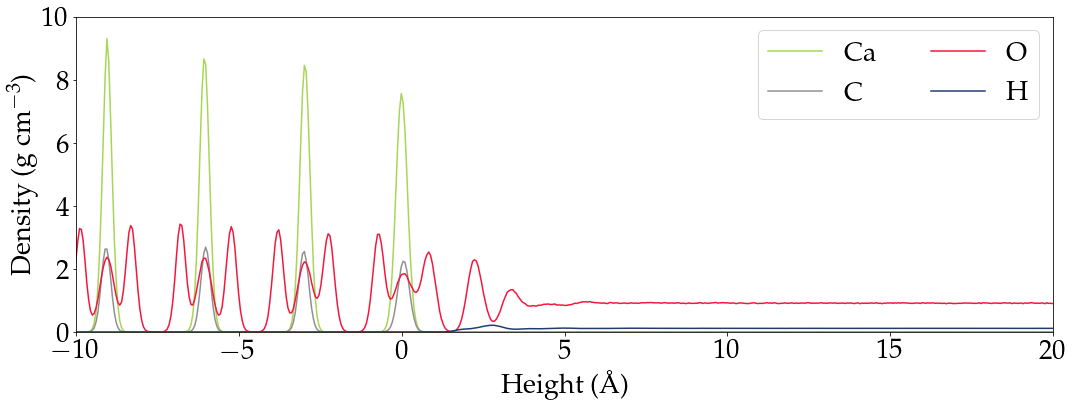

In [27]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9*3}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5*5,1.16*5)

coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom//Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom/Analysis/histoC-final.txt")[:,2]

area=39.8466115892*48.3891189264
numCa=576
numC=576
numO=4296
numH=5136
massCa=40.078
massC=12.011 
massO=15.9994
massH=1.
normCa=np.trapz(histoCa,x=coord)/(numCa*massCa*10/(6.0221408*area))
normC=np.trapz(histoC,x=coord)/(numC*massC*10/(6.0221408*area))
normO=np.trapz(histoO,x=coord)/(numO*massO*10/(6.0221408*area))
normH=np.trapz(histoH,x=coord)/(numH*massH*10/(6.0221408*area))

lw1=1.5 #0.85

offset=-14.627

plt.plot(coord-zsurf,histoCa/normCa,color=paletteCaCO3[0],label="Ca",linewidth=lw1)
plt.plot(coord-zsurf,histoC/normC,color=paletteCaCO3[1],label="C",linewidth=lw1)
plt.plot(coord-zsurf,histoO/normO,color=paletteCaCO3[2],label="O",linewidth=lw1)
plt.plot(coord-zsurf,histoH/normH,color=paletteCaCO3[3],label="H",linewidth=lw1)
plt.xlim([-10,20])
plt.ylim([0,10])
plt.legend(ncol=2)
plt.ylabel(r"Density (g cm$^{-3}$)")
plt.xlabel("Height (\AA)")

plt.show()

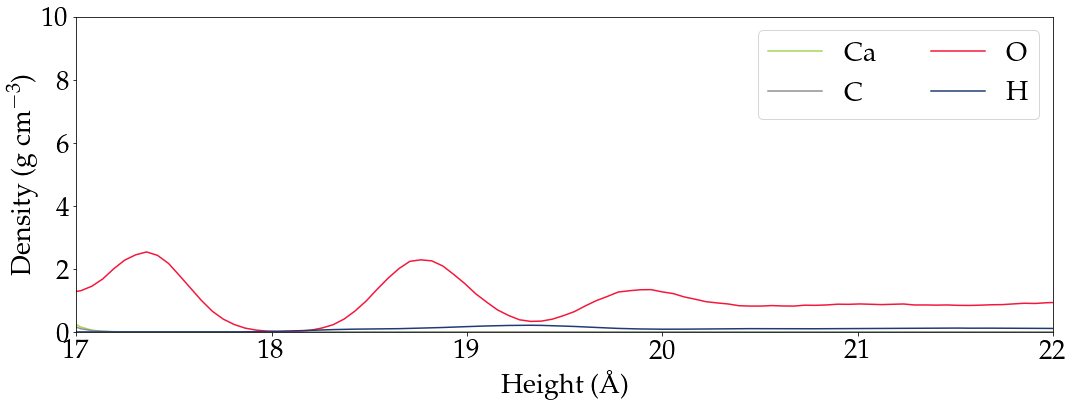

In [52]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9*3}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5*5,1.16*5)

coord=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom/Analysis/histoO-final.txt")[:,1]
histoO=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom/Analysis/histoO-final.txt")[:,2]
histoH=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom//Analysis/histoH-final.txt")[:,2]
histoCa=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom/Analysis/histoCa-final.txt")[:,2]
histoC=np.genfromtxt("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom/Analysis/histoC-final.txt")[:,2]

area=39.8466115892*48.3891189264
numCa=576
numC=576
numO=4296
numH=5136
massCa=40.078
massC=12.011 
massO=15.9994
massH=1.
normCa=np.trapz(histoCa,x=coord)/(numCa*massCa*10/(6.0221408*area))
normC=np.trapz(histoC,x=coord)/(numC*massC*10/(6.0221408*area))
normO=np.trapz(histoO,x=coord)/(numO*massO*10/(6.0221408*area))
normH=np.trapz(histoH,x=coord)/(numH*massH*10/(6.0221408*area))

lw1=1.5 #0.85

offset=-14.627

zsurf=2.9156273815883083-0.2

plt.plot(coord-zsurf,histoCa/normCa,color=paletteCaCO3[0],label="Ca",linewidth=lw1)
plt.plot(coord-zsurf,histoC/normC,color=paletteCaCO3[1],label="C",linewidth=lw1)
plt.plot(coord-zsurf,histoO/normO,color=paletteCaCO3[2],label="O",linewidth=lw1)
plt.plot(coord-zsurf,histoH/normH,color=paletteCaCO3[3],label="H",linewidth=lw1)
plt.xlim([17,22])
plt.ylim([0,10])
plt.legend(ncol=2)
plt.ylabel(r"Density (g cm$^{-3}$)")
plt.xlabel("Height (\AA)")

plt.show()

In [47]:
atoms = aseio.read("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom/dump2.water",index=":200")
print(len(atoms))

200


In [48]:
cat_atoms=Atoms()
for atom in atoms:
    cat_atoms.extend(atom)
cat_atoms.set_cell(atom.get_cell())

In [49]:
print(cat_atoms.get_positions().shape)
print(cat_atoms.get_cell())

(2116800, 3)
Cell([39.8466115892, 48.3891189264, 56.6444574693444])


In [50]:
aseio.write("iter-77/molecular-dynamics/production/flat-large-x221-production-fixatom/cat_caco3_2.lammps-data",cat_atoms)